# Precipitation analysis of the US stations' weather data

In this project I download the required files for historical weather data from NOAA along with the file of stations names and a readme file for instruction on how to use the weather data files. Then I try to parse each file and unroll it so I can have the files in a pleasant format which I need for more analysis. I also fill the nans with numpy.interp function.
Then I compute the total annual pericipitation and annual mean for each station. I also found the stations with the most/least pericipitation in the past five years, and the stations with strictly increasing/decreasing means in the past 20 years.
For the final part of this project I find the total annual precipitation for each country for the past 5 years and plot the precipitation for top 10 and bottom 10 countries. I also find the precipitation for each continent and plot the precipitation for each continent.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from array import *

In [2]:
# urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt', 'stations.txt')

In [3]:
stations = {}

for line in open('stations.txt', 'r'):
    if ('GSN' in line) and (line[0:2] == 'US'):
        fields = line.split()
        
        stations[fields[0]] = ' '.join(fields[4:])

In [4]:
stations

{'USP00CA0003': 'CA SACRAMENTO AP ASOS GSN 72483',
 'USW00003870': 'SC GREER GSN HCN 72312',
 'USW00003945': 'MO COLUMBIA RGNL AP GSN 72445',
 'USW00012836': 'FL KEY WEST INTL AP GSN HCN 72201',
 'USW00012842': 'FL TAMPA INTL AP GSN 72211',
 'USW00012916': 'LA NEW ORLEANS INTL AP GSN 72231',
 'USW00012921': 'TX SAN ANTONIO INTL AP GSN HCN 72253',
 'USW00013722': 'NC RALEIGH DURHAM INTL AP GSN 72306',
 'USW00013743': 'VA WASHINGTON REAGAN AP GSN 72405',
 'USW00013865': 'MS MERIDIAN KEY FLD GSN 72234',
 'USW00013880': 'SC CHARLESTON INTL AP GSN 72208',
 'USW00013882': 'TN CHATTANOOGA LOVELL AP GSN 72324',
 'USW00013957': 'LA SHREVEPORT GSN 72248',
 'USW00013962': 'TX ABILENE RGNL AP GSN 72266',
 'USW00013964': 'AR FT SMITH RGNL AP GSN 72344',
 'USW00013967': 'OK OKLAHOMA CITY WILL ROGERS AP GSN 72353',
 'USW00013984': 'KS CONCORDIA MUNI AP GSN 72458',
 'USW00013985': 'KS DODGE CITY GSN 72451',
 'USW00014607': 'ME CARIBOU MUNI AP GSN 72712',
 'USW00014742': 'VT BURLINGTON INTL AP GSN HCN 

In [5]:
def find_station(name):
    found = {key: value
             for key, value in stations.items()
             if name.lower() in value.lower()}
    return found

In [6]:
find_station('lihue')

{'USW00022536': 'HI LIHUE WSO AP 1020.1 GSN 91165'}

In [7]:
# for key in stations.keys():
#     try:
#         urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/gsn/{}.dly'.format(key), '{}.dly'.format(key))
#     except:
#         continue

In [8]:
open('USW00022536.dly', 'r').readlines()[:10]

['USW00022536195002TMAX  256  0  256  0  256  0  267  0  217  0  228  0  256  0  272  0  256  0  256  0  256  0  244  0  256  0  256  0  244  0  244  0  250  0  256  0  239  0  250  0  256  0  256  0  267  0  261  0  267  0  267  0  261  0  261  0-9999   -9999   -9999   \n',
 'USW00022536195002TMIN  178  0  156  0  161  0  167  0  167  0  167  0  189  0  211  0  206  0  217  0  217  0  211  0  200  0  200  0  206  0  183  0  206  0  206  0  206  0  194  0  206  0  200  0  206  0  200  0  211  0  183  0  172  0  200  0-9999   -9999   -9999   \n',
 'USW00022536195002PRCP    0  0    0  0    0  0    0  0  737  0  406  0   36  0   38  0    0T 0    0T 0    0  0    0T 0   18  0    5  0   10  0   18  0   15  0    5  0    0T 0    0T 0   23  0   10  0    3  0   48  0    0T 0    0T 0    0T 0    5  0-9999   -9999   -9999   \n',
 'USW00022536195002SNOW    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0

In [9]:
# urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt', 'readme.txt')

In [10]:
open('readme.txt', 'r').readlines()[108:131]

['------------------------------\n',
 'Variable   Columns   Type\n',
 '------------------------------\n',
 'ID            1-11   Character\n',
 'YEAR         12-15   Integer\n',
 'MONTH        16-17   Integer\n',
 'ELEMENT      18-21   Character\n',
 'VALUE1       22-26   Integer\n',
 'MFLAG1       27-27   Character\n',
 'QFLAG1       28-28   Character\n',
 'SFLAG1       29-29   Character\n',
 'VALUE2       30-34   Integer\n',
 'MFLAG2       35-35   Character\n',
 'QFLAG2       36-36   Character\n',
 'SFLAG2       37-37   Character\n',
 '  .           .          .\n',
 '  .           .          .\n',
 '  .           .          .\n',
 'VALUE31    262-266   Integer\n',
 'MFLAG31    267-267   Character\n',
 'QFLAG31    268-268   Character\n',
 'SFLAG31    269-269   Character\n',
 '------------------------------\n']

# Parsing each file

In [11]:
def parse_file(filename):
    daily_delimeter = [11, 4, 2, 4] + [5, 1, 1, 1] * 31
    daily_usecols = [1, 2, 3] + [4 * i for i in range(1, 32)]
    daily_dtype = [np.int32, np.int32, (np.str_, 4)] + [np.int32] * 31
    daily_names = ['year', 'month', 'obs'] + [str(day) for day in range(1, 32)]
    
    return np.genfromtxt(filename,
                 delimiter=daily_delimeter,
                 usecols=daily_usecols,
                 dtype=daily_dtype,
                 names=daily_names)

In [12]:
lihue = parse_file('USW00022536.dly')
lihue

array([(1950, 2, 'TMAX', 256,   256,   256,   267,   217,   228,   256,   272,   256,   256,   256,   244,   256,   256,   244,   244,   250,   256,   239,   250,   256,   256,   267,   261,   267,   267,   261,   261, -9999, -9999, -9999),
       (1950, 2, 'TMIN', 178,   156,   161,   167,   167,   167,   189,   211,   206,   217,   217,   211,   200,   200,   206,   183,   206,   206,   206,   194,   206,   200,   206,   200,   211,   183,   172,   200, -9999, -9999, -9999),
       (1950, 2, 'PRCP',   0,     0,     0,     0,   737,   406,    36,    38,     0,     0,     0,     0,    18,     5,    10,    18,    15,     5,     0,     0,    23,    10,     3,    48,     0,     0,     0,     5, -9999, -9999, -9999),
       ...,
       (2020, 2, 'WSF5', 143,    85,   148,    89,   134, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999),
       (2020, 2, 'WT01',

# Unrolling each file

In [13]:
def unroll(record):
    start_date = np.datetime64('{}-{:02}'.format(record['year'], record['month']))
    dates = np.arange(start_date, start_date + np.timedelta64(1, 'M'), np.timedelta64(1, 'D'))
    
    rows = [(date, record[str(i + 1)] / 10) for i, date in enumerate(dates)]
    
    return np.array(rows, dtype=[('date', 'M8[D]'), ('value', 'd')])

In [14]:
unroll(lihue[0])

array([('1950-02-01', 25.6), ('1950-02-02', 25.6), ('1950-02-03', 25.6),
       ('1950-02-04', 26.7), ('1950-02-05', 21.7), ('1950-02-06', 22.8),
       ('1950-02-07', 25.6), ('1950-02-08', 27.2), ('1950-02-09', 25.6),
       ('1950-02-10', 25.6), ('1950-02-11', 25.6), ('1950-02-12', 24.4),
       ('1950-02-13', 25.6), ('1950-02-14', 25.6), ('1950-02-15', 24.4),
       ('1950-02-16', 24.4), ('1950-02-17', 25. ), ('1950-02-18', 25.6),
       ('1950-02-19', 23.9), ('1950-02-20', 25. ), ('1950-02-21', 25.6),
       ('1950-02-22', 25.6), ('1950-02-23', 26.7), ('1950-02-24', 26.1),
       ('1950-02-25', 26.7), ('1950-02-26', 26.7), ('1950-02-27', 26.1),
       ('1950-02-28', 26.1)], dtype=[('date', '<M8[D]'), ('value', '<f8')])

# Get the data for pericipitation

In [15]:
def get_observations(filename, observation):
    data = np.concatenate([unroll(row) for row in parse_file(filename) if row[2] == observation])
    
    data['value'][data['value'] < -100] = np.nan
    
    return data

In [16]:
lihue_prcp = get_observations('USW00022536.dly', 'PRCP')
lihue_prcp

array([('1950-02-01',  0.), ('1950-02-02',  0.), ('1950-02-03',  0.), ...,
       ('2020-02-27', nan), ('2020-02-28', nan), ('2020-02-29', nan)],
      dtype=[('date', '<M8[D]'), ('value', '<f8')])

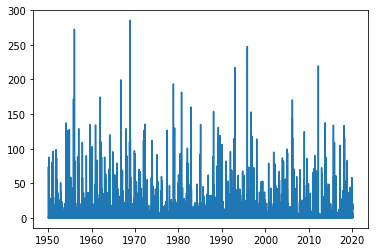

In [17]:
plt.plot(lihue_prcp['date'], lihue_prcp['value'])

# Filling the missed data points

In [18]:
def fill_nans(data):
    dates_float = data['date'].astype(np.float64)
    
    nans = np.isnan(data['value'])
    
    data['value'][nans] = np.interp(dates_float[nans], dates_float[~nans], data['value'][~nans])
    
    return data

In [19]:
lihue_prcp = fill_nans(lihue_prcp)
lihue_prcp

array([('1950-02-01',  0. ), ('1950-02-02',  0. ), ('1950-02-03',  0. ),
       ..., ('2020-02-27', 13.2), ('2020-02-28', 13.2),
       ('2020-02-29', 13.2)], dtype=[('date', '<M8[D]'), ('value', '<f8')])

# Finding the data values for a specific year

In [20]:
def select_year(data, year):
    start = np.datetime64('{}'.format(year))
    end = np.datetime64('{}'.format(year + 1))
    
    return data[(data['date'] >= start) & (data['date'] < end)]['value']

In [21]:
select_year(lihue_prcp, 1990)

array([  0. ,   1.5,   0.8,   0. ,   0.3,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,  21.8,   8.1,   4.3,   0. ,   2.3,
         9.4,  37.6, 106.2,  18.3,  25.1,   8.1,   0.3,   1.8,   0.3,
         0.3,   1. ,   0.3,   0. ,   3.3,   5.3,   6.9,   0.3,   2.8,
         2.3,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0.5,   1.5,   0.3,   0.3,   0. ,   0. ,   0. ,   0. ,
         4.6,  14.7,   0. ,   1.5,   0.3,   9.9,   0. ,   0. ,   0. ,
         0. ,  24.1,  24.4,   1.3,   3.3,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   5.1,   2.8,   2.5,   1.3,
         1.5,   2.8,   0.8,  21.8,   2.8,   0. ,   0. ,   8.4,   0. ,
         3. ,   0.3,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0.3,   0. ,   0. ,   2.3,   3.8,
        12.7,   4.1,  10.2,   4.8,   4.1,   0. ,   0.5,   0.3,   0.3,
         2.5,   0.3,

# Finding the data values for the time period between 1990 and 2020

In [22]:
lihue_prcp_all = np.vstack([select_year(lihue_prcp, year)[:365] for year in range(1990, 2020)])
lihue_prcp_all

array([[ 0. ,  1.5,  0.8, ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  1. ,  0.5,  1.3],
       [ 2.3,  3.8,  4.1, ..., 13. , 34.5, 23.6],
       ...,
       [ 0.3,  0. ,  0.3, ...,  0.3,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  5.1,  0. ,  1.3],
       [ 0.5,  0. ,  1.8, ...,  0. ,  0.5,  0. ]])

In [23]:
lihue_prcp_all.shape

(30, 365)

# Total annual pericipitation for 1 station

In [24]:
lihue_total = np.sum(lihue_prcp_all, axis=1)
lihue_total

array([1001.5, 1058.8, 1276.1,  567.4,  839.5, 1184.7, 1418.3, 1221.7,
        674.2,  845.1,  458.3,  744.6,  812.6,  910.7, 1170.8,  703.1,
       1704.7,  621.1,  981. ,  678.3,  661.4, 1085.1, 1046.7,  945.6,
        787.4,  765.2,  342.6,  603.5, 1322.7,  938.5])

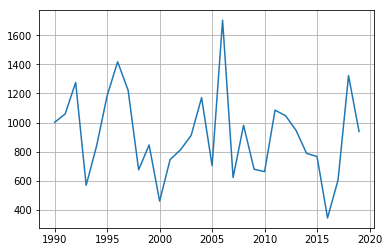

In [25]:
plt.plot(np.arange(1990, 2020, 1), lihue_total)
plt.grid()

# Total Annual Precipitation for each weather station in the US

In [26]:
stations_total_prcp = {}
for key in stations.keys():
    try:
        observed = get_observations('{}.dly'.format(key), 'PRCP')
        observed = fill_nans(observed)
        station_all = np.vstack([select_year(observed, year)[:365] for year in range(1990, 2020)])
        station_total = np.sum(station_all, axis=1)
        stations_total_prcp[key] = station_total
    except:
        continue

In [27]:
stations_total_prcp

{'USW00003870': array([1255.5, 1200.6, 1538.6,  997.8, 1306. , 1527. , 1364.5, 1272.3,
        1320.4,  913.2,  890.5, 1026.5, 1215.8, 1604. , 1212.1, 1350.2,
        1062.4,  790. ,  966.1, 1342.8, 1085.7, 1167.5,  987.6, 1766.8,
        1276.2, 1518. ,  875.3, 1350. , 1726.7, 1319. ]),
 'USW00012836': array([ 925.9 , 1045.8 ,  942.7 ,  916.  , 1190.1 ,  984.3 , 1047.3 ,
        1002.7 ,  753.55, 1216.5 ,  887.2 , 1205.9 , 1054.5 ,  965.7 ,
         765.9 , 1365.6 , 1007.3 ,  975.2 , 1000.9 ,  850.8 ,  999.4 ,
        1084.2 , 1194.7 , 1186.5 ,  930.6 ,  921.5 ,  949.7 ,  968.8 ,
         953.1 ,  899.3 ]),
 'USW00012842': array([ 873.8, 1097.6,  889.3,  954. , 1200.1, 1375.1, 1255.6, 1720.6,
        1406.4,  872.8,  758.2, 1009.7, 1577. , 1321.6, 1507.4,  990.1,
        1438.7, 1067. , 1112.5, 1165.4, 1024.9, 1352.2, 1422.9, 1333.9,
        1470.7, 1613.8, 1336. , 1126.3, 1561.8, 1543.8]),
 'USW00012916': array([1551.2, 2600.4, 2080.6, 1339.4, 1318.8, 1659.3, 1455.5, 1313.9,
        

# Finding the annual mean of pericipitation for each station

In [28]:
stations_mean_prcp = {}
for key in stations.keys():
    try:
        observed = get_observations('{}.dly'.format(key), 'PRCP')
        observed = fill_nans(observed)
        station_all = np.vstack([select_year(observed, year)[:365] for year in range(1990, 2020)])
        station_mean = np.mean(station_all, axis=1)
        stations_mean_prcp[key] = station_mean
    except:
        continue

/Users/behnam/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/behnam/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [29]:
stations_mean_prcp

{'USW00003870': array([3.43972603, 3.28931507, 4.21534247, 2.73369863, 3.57808219,
        4.18356164, 3.73835616, 3.48575342, 3.61753425, 2.50191781,
        2.43972603, 2.81232877, 3.3309589 , 4.39452055, 3.32082192,
        3.69917808, 2.91068493, 2.16438356, 2.64684932, 3.67890411,
        2.97452055, 3.19863014, 2.70575342, 4.84054795, 3.49643836,
        4.15890411, 2.39808219, 3.69863014, 4.73068493, 3.61369863]),
 'USW00012836': array([2.53671233, 2.86520548, 2.58273973, 2.50958904, 3.26054795,
        2.69671233, 2.86931507, 2.74712329, 2.06452055, 3.33287671,
        2.43068493, 3.30383562, 2.8890411 , 2.64575342, 2.09835616,
        3.74136986, 2.75972603, 2.67178082, 2.74219178, 2.3309589 ,
        2.73808219, 2.97041096, 3.27315068, 3.25068493, 2.54958904,
        2.52465753, 2.60191781, 2.65424658, 2.61123288, 2.46383562]),
 'USW00012842': array([2.3939726 , 3.00712329, 2.43643836, 2.61369863, 3.28794521,
        3.76739726, 3.44      , 4.7139726 , 3.85315068, 2.39123288,

# Finding stations with strictly increasing/decreasing means

In [30]:
stations_mean_std = {}
for key,value in stations_mean_prcp.items():
    try:
        stations_mean_std[key] = np.std(value)
    except:
        continue

In [31]:
sorted(stations_mean_std.items(), key=lambda x: x[1], reverse=True)

[('USW00014755', 0.874202388881482),
 ('USW00013957', 0.8316689931904891),
 ('USW00014842', nan),
 ('USW00024128', nan),
 ('USW00025339', 2.069650948186704),
 ('USW00021504', 2.0601934516835834),
 ('USW00012916', 0.9001568352560648),
 ('USW00093729', 0.8226139621720563),
 ('USW00022536', 0.8124861834996634),
 ('USW00024213', 0.740416549512346),
 ('USW00013964', 0.7357807720436029),
 ('USW00012921', 0.7176801319485925),
 ('USW00025624', 0.708180031184782),
 ('USW00012842', 0.692078752909922),
 ('USW00013865', 0.6868561704813432),
 ('USW00013882', 0.6779771985809151),
 ('USW00003870', 0.6778801752483588),
 ('USW00093817', 0.6663049900891997),
 ('USW00093820', 0.6290365309896466),
 ('USW00013880', 0.6246282510693415),
 ('USW00024227', 0.610124868073998),
 ('USW00013967', 0.5868467641389771),
 ('USW00013743', 0.5724560531782475),
 ('USW00014933', 0.5399354325129232),
 ('USW00013722', 0.5188924137876584),
 ('USW00094823', 0.4862071755624766),
 ('USW00013962', 0.4811545836059272),
 ('USW0001

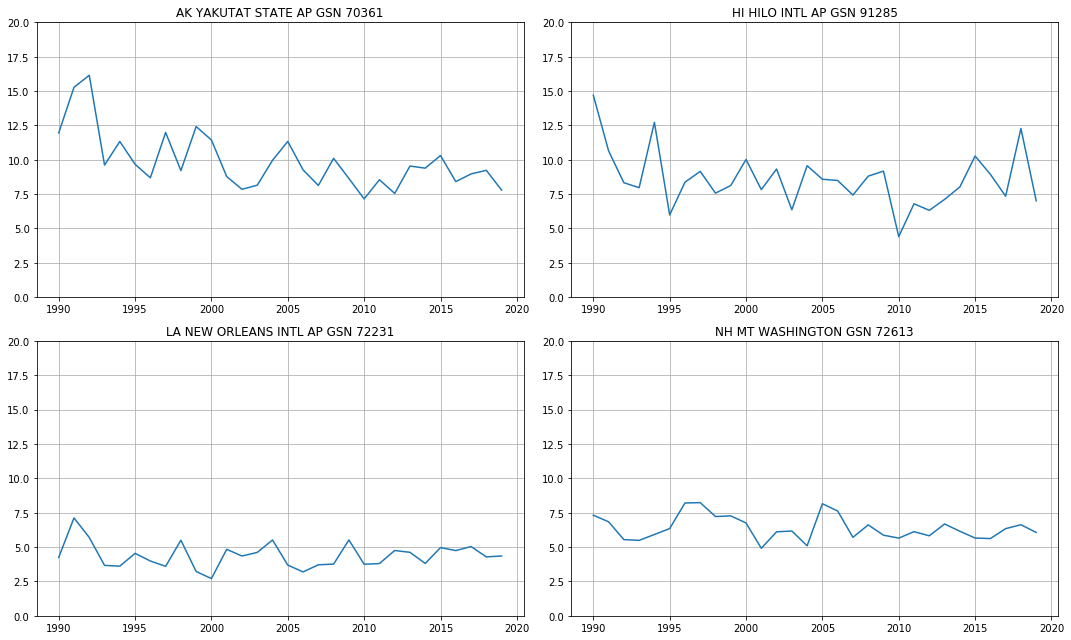

In [32]:
destinations = ['USW00025339', 'USW00021504', 'USW00012916', 'USW00014755']
plt.figure(figsize=(15, 9))

for i, code in enumerate(destinations):
    plt.subplot(2, 2, i+1)

    plt.plot(np.arange(1990, 2020, 1), stations_mean_prcp[code])
    
    plt.ylim(0, 20)
    plt.title(stations[code])
    plt.grid(True)

plt.tight_layout()

# Finding the total annual precipitation for the stations with the most (and the least) precipitation in the past five years (2015-2019)

In [33]:
stations_5yr_prcp = {}
for key, value in stations_total_prcp.items():
    stations_5yr_prcp[key] = np.sum(value[25:])
    
sorted(stations_5yr_prcp.items(), key=lambda x: x[1], reverse=True)

[('USW00021504', 16740.1),
 ('USW00025339', 16324.05),
 ('USW00014755', 11066.8),
 ('USW00093729', 8974.3),
 ('USW00012916', 8538.2),
 ('USW00013865', 7554.5),
 ('USW00013880', 7483.1),
 ('USW00013882', 7362.0),
 ('USW00012842', 7181.700000000001),
 ('USW00093820', 7151.6),
 ('USW00013964', 6981.6),
 ('USW00013957', 6861.199999999999),
 ('USW00003870', 6789.0),
 ('USW00093817', 6689.5),
 ('USW00024227', 6576.1),
 ('USW00013722', 6533.199999999999),
 ('USW00094823', 5795.4),
 ('USW00013743', 5615.9),
 ('USW00014771', 5515.7),
 ('USW00024213', 5510.4),
 ('USW00025624', 5443.099999999999),
 ('USW00013967', 5239.5),
 ('USW00014607', 5228.1),
 ('USW00014933', 5102.7),
 ('USW00014742', 4785.4),
 ('USW00012836', 4692.4),
 ('USW00012921', 4541.200000000001),
 ('USW00013984', 4188.7),
 ('USW00022536', 3972.5),
 ('USW00013962', 3949.5),
 ('USW00014941', 3750.2000000000003),
 ('USW00025713', 3657.45),
 ('USW00025503', 3269.45),
 ('USW00013985', 3258.3),
 ('USW00024023', 3141.0),
 ('USW00014936', 

# Plotting the total annual precipitation for the stations with the most precipitation in the past five years (2015-2019)

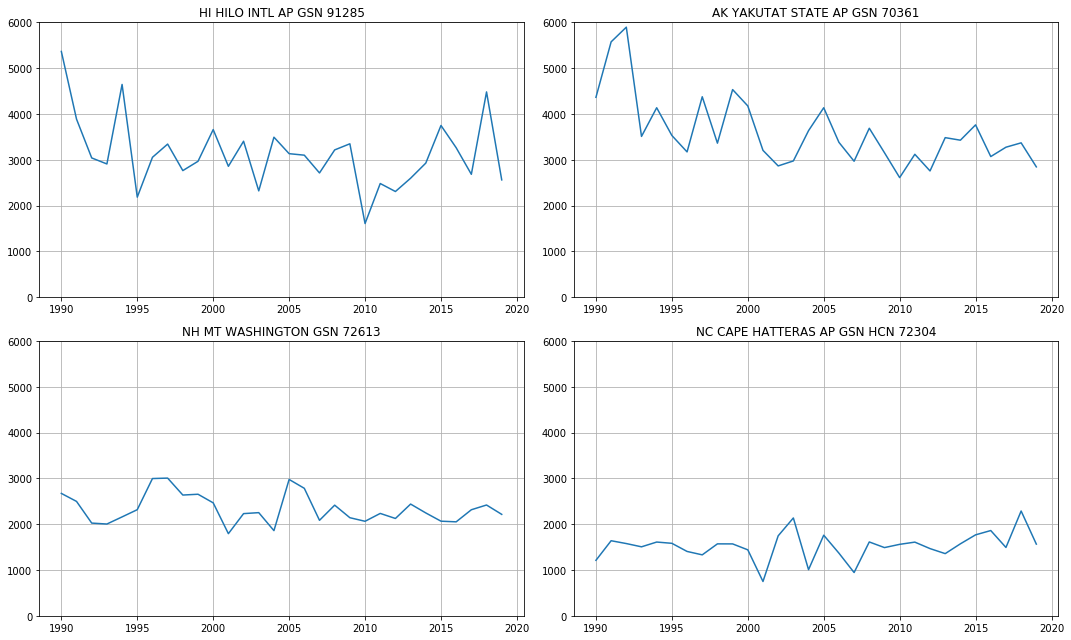

In [34]:
destinations = ['USW00021504', 'USW00025339', 'USW00014755', 'USW00093729']
plt.figure(figsize=(15, 9))

for i, code in enumerate(destinations):
    plt.subplot(2, 2, i+1)

    plt.plot(np.arange(1990, 2020, 1), stations_total_prcp[code])
    
    plt.ylim(0, 6000)
    plt.title(stations[code])
    plt.grid(True)

plt.tight_layout()

# Plotting the total annual precipitation for the stations with the least precipitation in the past five years (2015-2019)

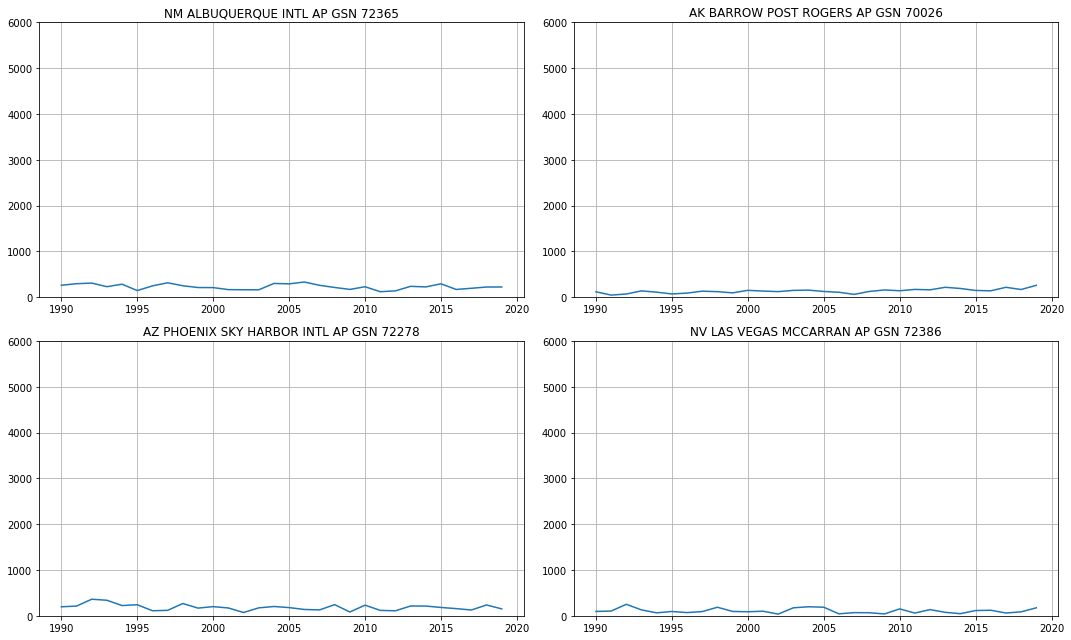

In [35]:
destinations = ['USW00023050', 'USW00027502', 'USW00023183', 'USW00023169']
plt.figure(figsize=(15, 9))

for i, code in enumerate(destinations):
    plt.subplot(2, 2, i+1)

    plt.plot(np.arange(1990, 2020, 1), stations_total_prcp[code])
    
    plt.ylim(0, 6000)
    plt.title(stations[code])
    plt.grid(True)

plt.tight_layout()

# Downloading the data for all the stations all around the world

In [36]:
stations = {}

for line in open('stations.txt', 'r'):
    if 'GSN' in line:
        fields = line.split()
        
        stations[fields[0]] = ' '.join(fields[4:])
stations

{'AE000041196': 'SHARJAH INTER. AIRP GSN 41196',
 'AF000040930': 'NORTH-SALANG GSN 40930',
 'AG000060390': 'ALGER-DAR EL BEIDA GSN 60390',
 'AG000060590': 'EL-GOLEA GSN 60590',
 'AG000060611': 'IN-AMENAS GSN 60611',
 'AG000060680': 'TAMANRASSET GSN 60680',
 'AJ000037989': 'ASTARA GSN 37989',
 'ALM00013615': 'TIRANA RINAS GSN 13615',
 'AM000037781': 'ARAGAC VISOKOGORNAYA GSN 37781',
 'AO000066160': 'LUANDA GSN 66160',
 'AO000066270': 'WAKU KUNGU (CELA) GSN 66270',
 'AO000066390': 'LUBANGO (SA DA BAND GSN 66390',
 'AO000066410': 'MENONGUE (SERPA PIN GSN 66410',
 'AO000066422': 'MOCAMEDES GSN 66422',
 'AO000066447': 'MAVINGA GSN 66447',
 'AQW00061705': 'AS PAGO PAGO WSO AP GSN 91765',
 'AR000087007': 'LA QUIACA OBSERVATO GSN 87007',
 'AR000087065': 'RIVADAVIA GSN 87065',
 'AR000087078': 'LAS LOMITAS GSN 87078',
 'AR000087155': 'RESISTENCIA AERO GSN 87155',
 'AR000087217': 'LA RIOJA AERO. GSN 87217',
 'AR000087257': 'CERES AERO GSN 87257',
 'AR000087270': 'RECONQUISTA AERO GSN 87270',
 'AR

In [37]:
# for key in stations.keys():
#     try:
#         urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/gsn/{}.dly'.format(key), '{}.dly'.format(key))
#     except:
#         continue

# Calculating the total annual precipitation for each station

In [38]:
np.sum(np.vstack(stations_total_prcp.values()), axis=0)

/Users/behnam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """Entry point for launching an IPython kernel.


array([53966.9 , 51598.4 , 50865.1 , 48887.5 , 50888.45, 47104.4 ,
       51046.5 , 50017.95, 51598.35, 45605.1 , 47006.3 , 43798.1 ,
       46180.4 , 47224.5 , 50613.8 , 47973.8 , 49085.3 , 44939.5 ,
       48003.7 , 48198.1 , 44499.9 , 48331.6 , 44827.  , 50687.  ,
       47204.3 , 54876.45, 48057.4 , 48625.3 , 57122.7 , 52270.15])

# Calculating the total precipitation for 5 years for each station

In [39]:
station_total_prcp = []
for key in stations.keys():
    
    try:
        observed = get_observations('{}.dly'.format(key), 'PRCP')
        observed = fill_nans(observed)
        station_all = np.vstack([select_year(observed, year)[:365] for year in range(2015, 2020)])
        station_total = np.sum(station_all)
        station_total_prcp.append([key, station_total])
        
    except:
        continue

In [40]:
station_total_prcp_copy = station_total_prcp
station_total_prcp_copy

[['AF000040930', 0.0],
 ['AG000060680', 0.0],
 ['ALM00013615', 0.0],
 ['AM000037781', 0.0],
 ['AO000066270', 0.0],
 ['AO000066410', 0.0],
 ['AO000066422', 0.0],
 ['AO000066447', 0.0],
 ['AQW00061705', 17526.699999999997],
 ['AR000087065', 0.0],
 ['AR000087155', 16304.099999999999],
 ['AR000087374', 12317.650000000001],
 ['ARM00087178', 21019.550000000003],
 ['ARM00087289', 14609.69375],
 ['ARM00087497', 11725.310000000001],
 ['ASM00094299', 3491.35],
 ['ASN00001019', 6109.4],
 ['ASN00002012', 2672.25],
 ['ASN00003003', 3905.7000000000003],
 ['ASN00004032', 1523.7],
 ['ASN00005007', 1110.1000000000001],
 ['ASN00006011', 650.5],
 ['ASN00007045', 970.9777777777778],
 ['ASN00007176', 1638.6],
 ['ASN00008051', 1899.55],
 ['ASN00009518', 3805.1000000000004],
 ['ASN00009741', 3588.6],
 ['ASN00009789', 2794.6],
 ['ASN00010286', 1586.6],
 ['ASN00011052', 940.1],
 ['ASN00012038', 1173.0],
 ['ASN00013017', 1498.9],
 ['ASN00014015', 8293.600000000002],
 ['ASN00014508', 7043.4],
 ['ASN00014932', 46

In [41]:
for item in station_total_prcp_copy:
    item[0] = item[0][0:2]
    item[1] = float(item[1])

station_total_prcp_copy

[['AF', 0.0],
 ['AG', 0.0],
 ['AL', 0.0],
 ['AM', 0.0],
 ['AO', 0.0],
 ['AO', 0.0],
 ['AO', 0.0],
 ['AO', 0.0],
 ['AQ', 17526.699999999997],
 ['AR', 0.0],
 ['AR', 16304.099999999999],
 ['AR', 12317.650000000001],
 ['AR', 21019.550000000003],
 ['AR', 14609.69375],
 ['AR', 11725.310000000001],
 ['AS', 3491.35],
 ['AS', 6109.4],
 ['AS', 2672.25],
 ['AS', 3905.7000000000003],
 ['AS', 1523.7],
 ['AS', 1110.1000000000001],
 ['AS', 650.5],
 ['AS', 970.9777777777778],
 ['AS', 1638.6],
 ['AS', 1899.55],
 ['AS', 3805.1000000000004],
 ['AS', 3588.6],
 ['AS', 2794.6],
 ['AS', 1586.6],
 ['AS', 940.1],
 ['AS', 1173.0],
 ['AS', 1498.9],
 ['AS', 8293.600000000002],
 ['AS', 7043.4],
 ['AS', 4607.5],
 ['AS', 2034.8],
 ['AS', 1909.1666666666665],
 ['AS', 1149.1666666666665],
 ['AS', 767.0],
 ['AS', 1234.3000000000002],
 ['AS', 1788.4],
 ['AS', 2575.95],
 ['AS', 3582.0999999999995],
 ['AS', 7925.0999999999985],
 ['AS', 3412.0],
 ['AS', 2155.5],
 ['AS', 2474.8],
 ['AS', 3671.6],
 ['AS', 9772.349999999999],

# Calculating the total precipitation for 5 years for each country

In [42]:
summed = {}

for i in range(len(station_total_prcp_copy)):
      
        try:
            value = summed.get(station_total_prcp_copy[i][0])

            if not value:
                value = 0

            value += station_total_prcp_copy[i][1]

            summed[station_total_prcp_copy[i][0]] = value

        
        except:
            continue

In [43]:
summed

{'AF': 0.0,
 'AG': 0.0,
 'AL': 0.0,
 'AM': 0.0,
 'AO': 0.0,
 'AQ': 17526.699999999997,
 'AR': 75976.30375,
 'AS': 180178.8111111111,
 'AU': 16246.795,
 'AY': 11994.50588235294,
 'BB': 0.0,
 'BD': 8141.049999999999,
 'BF': 7393.75,
 'BK': 18705.675000000003,
 'BL': 0.0,
 'BP': 17545.775,
 'BR': 0.0,
 'CA': 101637.91666666667,
 'CH': 124703.92336691085,
 'CJ': 4121.3,
 'CK': 0.0,
 'CO': 11744.05,
 'CW': 6228.333333333333,
 'CY': 1763.0999999999997,
 'DA': 7118.950000000001,
 'EG': 0.0,
 'EI': 14617.050000000001,
 'EN': 3345.7,
 'ER': 0.0,
 'ET': 0.0,
 'EZ': 5256.8,
 'FG': 16883.850000000002,
 'FI': 8757.2,
 'FJ': 23252.45,
 'FM': 58999.7,
 'FP': 46963.35,
 'FR': 24239.95,
 'GM': 15245.499999999998,
 'GQ': 12870.6,
 'GR': 11900.4,
 'HR': 4505.349999999999,
 'HU': 1407.7000000000003,
 'IC': 0.0,
 'ID': 0.0,
 'IN': 5505.890909090909,
 'IR': 7839.000000000001,
 'IS': 120.75000000000001,
 'IT': 12931.0,
 'IZ': 1013.45,
 'JA': 77375.35,
 'JM': 4745.4,
 'JN': 3151.2,
 'KR': 10512.099999999999,


# Top 10 countries in terms of total annual precipitation in the past 5 years (2015-2019)

In [44]:
sorted(summed.items(), key=lambda x: x[1], reverse=True)[:10]

[('US', 283839.5),
 ('RS', 207845.80696428573),
 ('AS', 180178.8111111111),
 ('CH', 124703.92336691085),
 ('CA', 101637.91666666667),
 ('JA', 77375.35),
 ('AR', 75976.30375),
 ('MY', 73347.35),
 ('PK', 72344.31842105265),
 ('FM', 58999.7)]

# Bottom 10 countries in terms of total annual precipitation in the past 5 years (2015-2019)

In [45]:
sorted(summed.items(), key=lambda x: x[1], reverse=True)[90:]

[('LY', 0.0),
 ('ML', 0.0),
 ('MR', 0.0),
 ('NI', 0.0),
 ('SA', 0.0),
 ('SU', 0.0),
 ('SX', 0.0),
 ('VE', 0.0),
 ('WA', 0.0),
 ('ZA', 0.0)]

# Calculating each continent's precipitation

In [46]:
Asia = ['CH', 'IS', 'MG', 'MU', 'UZ', 'IN', 'IR', 'PK', 'TH', 'RP', 'RS', 'CE', 'JA', 'KS', 'TU', 'TX', 'VM']
Europe = ['SZ', 'SV', 'BO', 'AU', 'RO', 'UK', 'BE', 'CY', 'FI', 'FR', 'GR', 'HR', 'HU', 'LU', 'MD', 'MT', 'NL', 
          'NO', 'PL', 'UP', 'DA', 'EI', 'GM', 'JN', 'LG', 'LH', 'PO', 'SP']
Africa = ['BN', 'SG', 'MP', 'AG', 'CD', 'EG', 'MA', 'MZ', 'NG', 'TZ', 'UV', 'BC', 'IV', 'SF', 'TS', 'WA', 'ZI']
Norht_America = ['BF', 'US', 'CA', 'CU', 'GL', 'RQ', 'CS']
South_America = ['CI', 'PA', 'AR', 'UY', 'BR', 'PE', 'BL', 'FG']
Oceania = ['PS', 'GQ', 'AQ', 'AS', 'FM', 'WF', 'RM', 'BP', 'FP', 'NH']
Antarctica = ['FS']

In [47]:
Continents_prcp = {'Asia_prcp': 0, 'Europe_prcp': 0, 'Africa_prcp': 0, 'North_America_prcp': 0, 
                  'South_America_prcp': 0, 'Oceania_prcp':0, 'Antarctica_prcp': 0}


for name in summed.keys():

    if name in Asia:
        Continents_prcp['Asia_prcp'] += summed[name]
    elif name in Europe:
        Continents_prcp['Europe_prcp'] += summed[name]
    elif name in Africa:
        Continents_prcp['Africa_prcp'] += summed[name]  
    elif name in Norht_America:
        Continents_prcp['North_America_prcp'] += summed[name]
    elif name in South_America:
        Continents_prcp['South_America_prcp'] += summed[name]
    elif name in Oceania:
        Continents_prcp['Oceania_prcp'] += summed[name]
    elif name in Antarctica:
        Continents_prcp['Antarctica_prcp'] += summed[name]

        
sorted(Continents_prcp.items(), key=lambda x: x[1], reverse=True)


[('Asia_prcp', 626020.5889037643),
 ('North_America_prcp', 400128.3666666667),
 ('Oceania_prcp', 380119.7694444444),
 ('Europe_prcp', 228874.33666666667),
 ('South_America_prcp', 157019.44041666668),
 ('Africa_prcp', 60126.68),
 ('Antarctica_prcp', 0)]

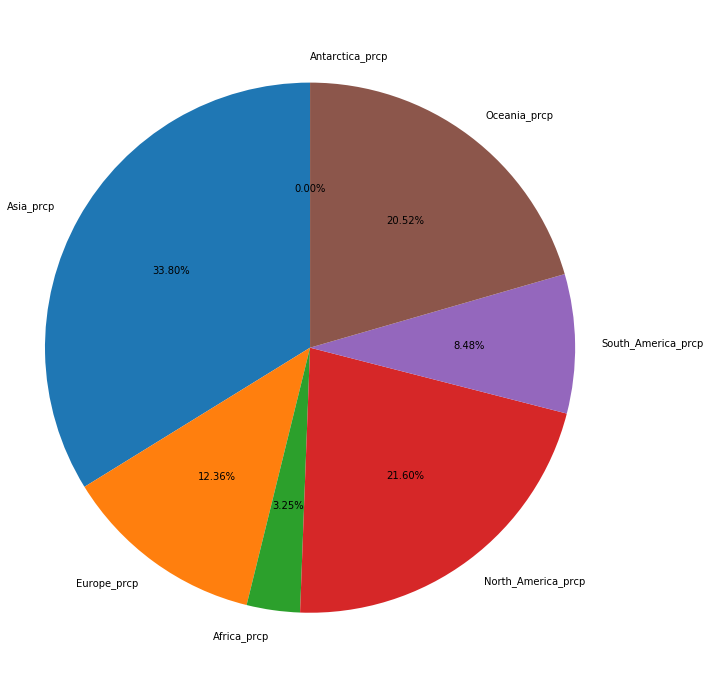

In [48]:
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)
plt.pie(Continents_prcp.values(), labels=Continents_prcp.keys(), autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.tight_layout()